Experiments with neural networks to improve performance or just check the influence of changing some parameters on the model performance

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, BatchNormalization
from tensorflow.keras.layers import Dropout, LSTM, TimeDistributed, MaxPool2D, Reshape
from tensorflow.keras.applications import resnet50
from sklearn.metrics         import accuracy_score

Connect to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Upload prepared NumPy arrays

In [ ]:
link_to_drive = '/content/drive/MyDrive/DL_Final_Project/'
X_val   = np.load(link_to_drive + 'X_val.npy')
X_train = np.load(link_to_drive + 'X_train.npy')
y_val   = np.load(link_to_drive + 'y_val.npy')
y_train = np.load(link_to_drive + 'y_train.npy')
X_test  = np.load(link_to_drive + 'X_test.npy')
y_test  = pd.read_csv(link_to_drive + 'Test.csv')

Function to build AlexNet model




In [ ]:
def AlexNet_NN(X_train):
  model = Sequential()
  model.add(Conv2D(filters=96, kernel_size=(3,3), padding='same',
                  activation='relu', input_shape=X_train.shape[1:]))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(43, activation='softmax'))
  return model

Function to build the GoogleNet model

In [ ]:
def VGG_NN(X_train):
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                  activation='relu', input_shape=X_train.shape[1:]))
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),padding='same'))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(43, activation='softmax'))
  return model

Function to define ResNet50 model

In [ ]:
def ResNet_NN(X_train):
  input_image = Input(shape=X_train.shape[1:])
  model = tf.keras.applications.ResNet50(include_top=True, 
                                            input_tensor=input_image,
                                            weights=None, 
                                            input_shape=None, 
                                            pooling=None, 
                                            classes=43)
  return model

Initialization of some parameters

In [ ]:
epochs = 10
batch_size = 128
learning_rate = 1e-2
opt = tf.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, decay=0)
loss_func = 'categorical_crossentropy'
metrics=['accuracy']

Choose ImageNet-100 model

In [ ]:
chosen_model = "ResNet" # (Options: AlexNet, VGG, ResNet)

if chosen_model == "AlexNet":
  print('AlexNet has been chosen')
  model = AlexNet_NN(X_train)
elif chosen_model == "VGG":
  print('VGG-16 has been chosen')
  model = VGG_NN(X_train)
elif chosen_model == "ResNet":
  print('ResNet has been chosen')
  model = ResNet_NN(X_train)

ResNet has been chosen


Compiling and fitting the chosen model

In [ ]:
model.compile(loss=loss_func, 
              optimizer=opt, 
              metrics=metrics)

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
246/246 [==============================] - 47s 163ms/step - loss: 4.5931 - accuracy: 0.1289 - val_loss: 9.4454 - val_accuracy: 0.0685
Epoch 2/10
246/246 [==============================] - 39s 157ms/step - loss: 3.6012 - accuracy: 0.2076 - val_loss: 36.9279 - val_accuracy: 0.0709
Epoch 3/10
246/246 [==============================] - 38s 156ms/step - loss: 3.2182 - accuracy: 0.2926 - val_loss: 6.3690 - val_accuracy: 0.0673
Epoch 4/10
246/246 [==============================] - 38s 155ms/step - loss: 2.3335 - accuracy: 0.4329 - val_loss: 2.3297 - val_accuracy: 0.3170
Epoch 5/10
246/246 [==============================] - 38s 156ms/step - loss: 1.5260 - accuracy: 0.5956 - val_loss: 2.4228 - val_accuracy: 0.3462
Epoch 6/10
246/246 [==============================] - 38s 155ms/step - loss: 1.5151 - accuracy: 0.6166 - val_loss: 1.3907 - val_accuracy: 0.5658
Epoch 7/10
246/246 [==============================] - 38s 155ms/step - loss: 1.1269 - accuracy: 0.7242 - val_loss: 1.1513 - val_a

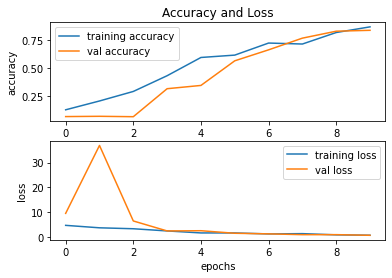

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig(chosen_model + '_accuracy_loss.png')

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

labels = y_test['ClassId'].values
print(accuracy_score(labels, classes_x))

0.7044338875692795
